<h1 style="text-align:center">ASI assessed exercise 2017/2018</h1>
<h3>Marine Poulard</h3>
<d3>2nd May 2018</d3>



In this work we will analyze the Fashion MNIST and CIFAR10 datasets available to download from:
- https://www.kaggle.com/zalando-research/fashionmnist/data
- https://www.cs.toronto.edu/~kriz/cifar.htm

<div class="alert alert-danger">
<h4>1) (code) Download the MNIST and CIFAR10 datasets and import them.</h4>
</div>

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
import math
import csv
import scipy
from sklearn.metrics import confusion_matrix, log_loss, mean_squared_error



### MNIST Data

In [2]:
def loadCsv(filename):
    lines = csv.reader(open(filename))
    dataset = list(lines)
    del dataset[0] #it is the line of the strings indicating the pixels
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

In [3]:
data_fmnist_test = loadCsv('fashion-mnist_test.csv')
data_fmnist_train = loadCsv('fashion-mnist_train.csv')

As detailed on the MNIST data website, each row represents an image. The first column indicates the label associated  with the image while the others are the pixel values. 

In [4]:
#In case we need the labels separately:
def get_labels(x):
    return [x_i[0] for x_i in np.array(x)]

y_data_fmnist_test = get_labels(data_fmnist_test)
y_data_fmnist_train = get_labels(data_fmnist_train)

### CIFAR10 Data

In [5]:
def unpickle(file):#Method advised on the CIFAR10 website
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [6]:
dict_data_batch_1 = unpickle('data_batch_1')
dict_data_batch_2 = unpickle('data_batch_2')
dict_data_batch_3 = unpickle('data_batch_3')
dict_data_batch_4 = unpickle('data_batch_4')
dict_data_batch_5 = unpickle('data_batch_5')
dict_test_batch = unpickle('test_batch')

In [7]:
for key in dict_data_batch_1:
   print(key)

b'filenames'
b'data'
b'batch_label'
b'labels'


b'batch_label' and b'filenames'indicate the number if the batch and the titltes of the images. In our case, we are only interrested by b'labels' and b'data'. First, we want to merge all the batches to have one CIFAR dataset. Then, let's try to convert CIFAR10 into MNIST format to have a same input format when applying the algorithm.

In [25]:
#### Merging the batches
def BatchDictMerging(dict1,dict2, dict3, dict4, dict5):
    result = {}
    result[b'batch_label'] = "b'all training batch'"
    result[b'labels'] = dict1[b'labels'] + dict2[b'labels'] + dict3[b'labels'] + dict4[b'labels'] + dict5[b'labels']
    result[b'data'] = np.array(list(dict1[b'data']) + list(dict2[b'data']) + list(dict3[b'data']) + list(dict4[b'data']) + list(dict5[b'data']))
    result[b'filenames'] = dict1[b'filenames'] + dict2[b'filenames'] + dict3[b'filenames'] + dict4[b'filenames'] + dict5[b'filenames']
    return result

In [26]:
dict_data_all_batchs = BatchDictMerging(dict_data_batch_1,dict_data_batch_2,dict_data_batch_3,dict_data_batch_4,dict_data_batch_5)
print('done')

done


In [8]:
def convert(data, labels):
    result = []
    for i in range(len(labels)):
            vector = list(data[i])
            label = labels[i]
            line = [label] + vector
            result.append(line)
    return result 

In [27]:
data_cifar_train = convert(dict_data_all_batchs[b'data'], dict_data_all_batchs[b'labels'])
data_cifar_test = convert(dict_test_batch[b'data'], dict_test_batch[b'labels'])

y_data_cifar_train = dict_data_all_batchs[b'labels']
y_data_cifar_test = dict_test_batch[b'labels']

<div class="alert alert-danger">
<h4>2) (text) Comment on the distribution of class labels and the dimensionality of the input and how these may affect the analysis.</h4>
</div>

First, let'splot the distribution of the probabilities over the classes.

In [12]:
def plotLabelHist(y_test, y_train, title):
    fig, ax = plt.subplots(1,2,figsize=(13,5)); b=np.arange(0,11)-0.5
    h_t = ax[0].hist(y_test, edgecolor='gray', align='mid', bins=b )
    ax[0].set_xticks((np.arange(0,10))); ax[0].grid(axis='y', linestyle=':')
    ax[0].set_title("Distribution of labels in "+title+" Test")
    h_tr = ax[1].hist(y_train, edgecolor='gray', align='mid', bins=b )
    ax[1].set_xticks((np.arange(0,10))); ax[1].grid(axis='y', linestyle=':')
    ax[1].set_title("Distribution of labels in "+title+" Training")
    plt.show(); 

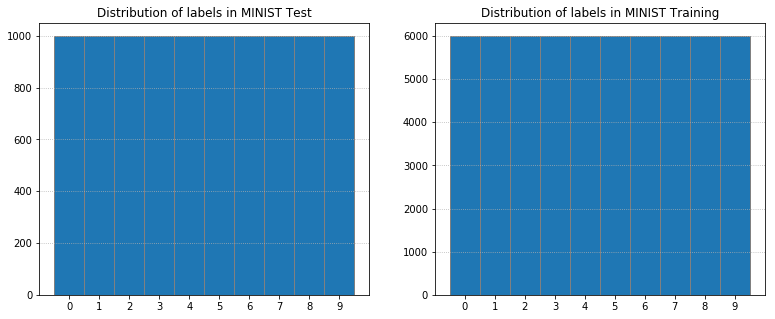

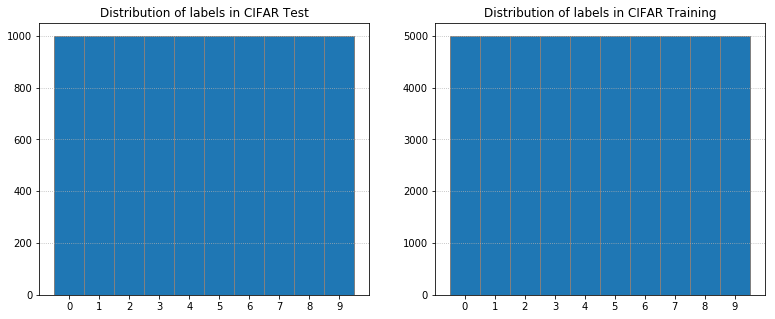

In [13]:
plotLabelHist(y_data_fmnist_test, y_data_fmnist_train, 'MINIST')
plotLabelHist(y_data_cifar_test, y_data_cifar_train, 'CIFAR')

Dimensionality of the input:

In [28]:
print('Number of MNIST train images: ', len(data_fmnist_train))
print('Number of MNIST test images: ', len(data_fmnist_test))
print('Number of MNIST pixel values per image: ', len(data_fmnist_train[0])-1)

print('Number of CIFAR train images', len(data_cifar_train))
print('Number of CIFAR test images: ', len(data_cifar_test))
print('Number of CIFAR pixel values per image: ', len(data_cifar_train[0])-1)

Number of MNIST train images:  60000
Number of MNIST test images:  10000
Number of MNIST pixel values per image:  784
Number of CIFAR train images 50000
Number of CIFAR test images:  10000
Number of CIFAR pixel values per image:  3072


<div class="alert alert-info" role="alert">
**Answer**

<br>
The mnist dataset has 60000 training images and 10000 test images. Each one represents a single digit that is  already correctly labelled. Each input image is represented by a list of 784 8-bit integers (values range from 0 - black to 255 white). 
<br>
The CIFAR10 dataset has 10000 training images per batch (and 5 batches) and 10000 test images. Each one represents an object in a coloured image that is already correctly labelled. Each input image is represented by a list of 1024 RGB values (3x8-bit integers, values range from 0 - 255).
 
<br>
<br>
In both MINIST and CIFAR dataset, the labels for the train and the test are faily distributed. It is also the case for a single CIFAR data batch, which means that we can use a single one to have more results.
<br> 
It is and advantage since we can expect that the implemented models will be able to learn the 'patterns' of each label equally. Moreover, the test dataset will be adapted to the model we trained so it will legitimate the results of accuracy we will obtain.
<br>
<br>
We can notice the big number of pixel values for the CIFAR dataset (3072), which can lead to difficulties to train well the model (we probably need a lot of training data, and it can be computationally intensive).


</div>



<div class="alert alert-danger">
<h4>3) Classification</h4>
<br>
a) (code) Implement the Naïve Bayes classifier. 
</div>


<div class="alert alert-light" role="alert">

Naive Bayes classifier is based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features. Given a class variable y and a dependent feature vector $x_1$ through $x_n$, Bayes’ theorem states the following relationship:

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)} {P(x_1, \dots, x_n)}$$
Which can be written as: $${\displaystyle {\mbox{posterior}}={\frac {{\mbox{prior}}\times {\mbox{likelihood}}}{\mbox{evidence}}}\,}$$

Using the naive independence assumption that

$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y),$$

for all i, this relationship is simplified to

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)} {P(x_1, \dots, x_n)}$$

Since $P(x_1, \dots, x_n)$ is constant given the input, we can use the following classification rule:

$$P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$ $$ \hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),$$


 $P(y)$ is then the relative frequency of class y in the training set.
</div>

We can divide the algorithm into 3 steps:
- Summarize the data: summarize the properties in the training dataset so that we can calculate probabilities and make predictions.
- Make a Prediction: use the summaries of the dataset to generate a single prediction.
- Make Predictions: generate predictions given a test dataset and a summarized training dataset.

### Summarize the data

In [10]:
def separateByClassM(dataset): #return a dictionary with keys=labels, values= [datapoints]
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[0] not in separated):
            separated[vector[0]] = []
        nonlabvector = vector[1:]  # first column = labels
        separated[vector[0]].append(nonlabvector)
    return separated


def mean(numbers):
    return sum(numbers)/float(len(numbers))
 
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers))  #same as np.std and np.mean
    if (variance == 0): return 10 ** (-3) #set minimum of the variance value
    return math.sqrt(variance)


def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    return summaries


def summarizeByClass(data): #return a dict with the mean and variance for each class 
    separated = separateByClassM(data)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

### Make predictions

In [11]:
#Calculate probabilities

def calculatePrior(dataset): #define the probabilities of belonging to a class
    Priors = [0,0,0,0,0,0,0,0,0,0]
    for i in range(len(dataset)):
        index = int(dataset[i][0])
        Priors[index] += 1
    for j in range((len(Priors))):
        if (Priors[j] == 0): Priors[j] = -(10**3) #set the prior to a minimum value
        else: 
            Priors[j] = math.log(Priors[j]/len(dataset)) #handling the small values with a log
    return Priors


def calculateProbability(x, mean, stdev): #define the probability of belonging to a class given the class and a data point 
    exponent = -(math.pow(x-mean,2)/(2*math.pow(stdev,2)))
    result = exponent - math.log((math.sqrt(2*math.pi) * stdev))
    return result


def calculateClassProbabilities(summaries, inputVector, Priors): #define the probabilities of belonging to a class given a data point 
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = Priors[int(classValue)]
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i+1]
            probabilities[classValue] += calculateProbability(x, mean, stdev)
        
        
    return probabilities
#Notice that we don't compute the normalisation constant since we just want to evaluate the higher probability


#Make predictions

def predict(summaries, inputVector,Priors):
    probabilities = calculateClassProbabilities(summaries, inputVector,Priors)
    probas = [0,0,0,0,0,0,0,0,0,0]
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        probas[int(classValue)] = probabilities[classValue]
        if bestLabel is None or probability > bestProb: #Choosing the class of higher conditional probability
            
            bestProb = probability
            bestLabel = classValue
    return bestLabel,probas

def getPredictions(summaries, testSet, Priors):
    predictions = []
    probas = []
    for i in range(len(testSet)):
        result,prob = predict(summaries, testSet[i],Priors)
        
        predictions.append(result)
        probas.append(prob)
        
    return predictions,probas #return the predicted labels and their probabilities

### Implementation

In [12]:
def bayesianClassifier(test,train):
    summaries = summarizeByClass(train)
    Priors = calculatePrior(train)
    #Prediction 
    predictions,probas = getPredictions(summaries, test, Priors)
    return predictions,probas
    

<h4>Comments</h4>
- We need to handle the case where a variance equals to zero. In theory, it means that the gaussian is a dirac, but in practice, a value really close to the mean can't be considered as null. So we set a minimum value. 
- We also set a minimum value for the priors, so that all the classes are taken into consideration.
- Obviously, we use the logarithm of the probablities, otherwise we would have too small values.

<div class="alert alert-danger">
b) (text) Describe a positive and a negative feature of the classifier for these tasks 
</div>

<div class="alert alert-info" role="alert">
<h4>Answer </h4>
<br>
Advantages:
<br>
- it is a nonparametric regression: the predictor does not take a predetermined form but is constructed according to information derived from the data.<br>
- it is simple to use and implement.<br>
- it is fast to execute.<br>
- it works well even if the indepency assumption is not respected.<br>
- it is unsensitive to irrelevant features.<br>
<br>



Disadvantages:
<br>
- limitations with big datasets (so probably CIFAR...).<br>
- highly dependant of the training data (if it's unbalanced for instance).<br>
- do not take into account the correlation between the images.<br>
- accept 'probabilities' over 1, which can lead to some instabilities.<br>
</div>

<div class="alert alert-danger">
c) (text) Describe any data pre-processing that you suggest for this data and your classifier 
</div>

<div class="alert alert-info" role="alert">
<h4>Answer </h4>
<br>

Besides the pre-processes mentioned before, we can perform the folowing task to improve the performence:<br>
- normalizing the data features:  substracting each value with it mean and dividing by the standard deviation. Working with small numbers could help avoiding overflows and long computational time  because all the multivariate gaussians would have the same characteristics.<br>
- converting the RGB CIFAR images into B&W, which would reduce the vast amount of features of this dataset.
- performing 'outlier detection' and filtering. <br>
- using approaches such as Prinipal Component Analysis, still to reduce the dimensionality of our objects (especially for CIFAR images).<br>
</div>


<div class="alert alert-danger">
d) (code) Apply your classifier to the two given datasets. Make sure your optimization is clearly commented. Use classification accuracy and test log-likelihood as your figures of merit.
</div>

### Accuracy and log-Likelihood

In [13]:
def get_accuracy(predicted, real):
    return np.sum([(predicted[k]) == real[k] for k in np.arange(len(predicted))])/100

In [36]:
def log_likelihood(predicted,probas):
    return mean([probas[i][int(predicted[i])] for i in range(len(probas))])

<h4>Comment</h4>
<br>
In order to optimize the model, we could have included the accuracy test in the loop of the prediction functions. But it is clearer to separate it in the code.

### Applying the classifier to the datasets

In [14]:
#Prediction
predicted_fmnist, proba_fmnist = bayesianClassifier(data_fmnist_test,data_fmnist_train)
predicted_cifar, proba_cifar = bayesianClassifier(data_cifar_test,data_cifar_train)


In [38]:
#Accuracy
acc_mnist = get_accuracy(predicted_fmnist,y_data_fmnist_test)
acc_cifar = get_accuracy(predicted_cifar,y_data_cifar_test)
print('Accuracy for MNIST dataset: ', acc_mnist)
print('Accuracy for CIFAR dataset: ', acc_cifar)

#Log-loss

print("Log loss for MNIST dataset:",log_loss(predicted_fmnist,proba_fmnist ))
print("Log loss for CIFAR dataset:",log_loss(predicted_cifar,proba_cifar ))

# Log likelihood
print("Log likelihood for MNIST dataset:",log_likelihood(predicted_fmnist,proba_fmnist))
print("Log likelihood for CIFAR dataset:",log_likelihood(predicted_cifar,proba_cifar))



Accuracy for MNIST dataset:  58.77
Accuracy for CIFAR dataset:  29.3
Log loss for MNIST dataset: 2.3025850929940463
Log loss for CIFAR dataset: 2.3025850929940463
Log likelihood for MNIST dataset: -3464.074380951596
Log likelihood for CIFAR dataset: -16703.885055098992


Here we can observe that there is the same log loss for both of the datasets. It is normal since no normalisation has been applied. If we normalize (for instance all the values by 255), we will obtain almost the same result for MNIST, and a result of 9.4 with the CIFAR dataset. It is also normal to obtain a log likelihood lower for CIFAR since we have more pixel values per image (so log probabilities with lower values).

<div class="alert alert-danger">
e) (code) Display the confusion matrix on the test data 
</div>

In [23]:
# Cf http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    "I have found all the default parameters on scikit-learn.org for the plots"
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

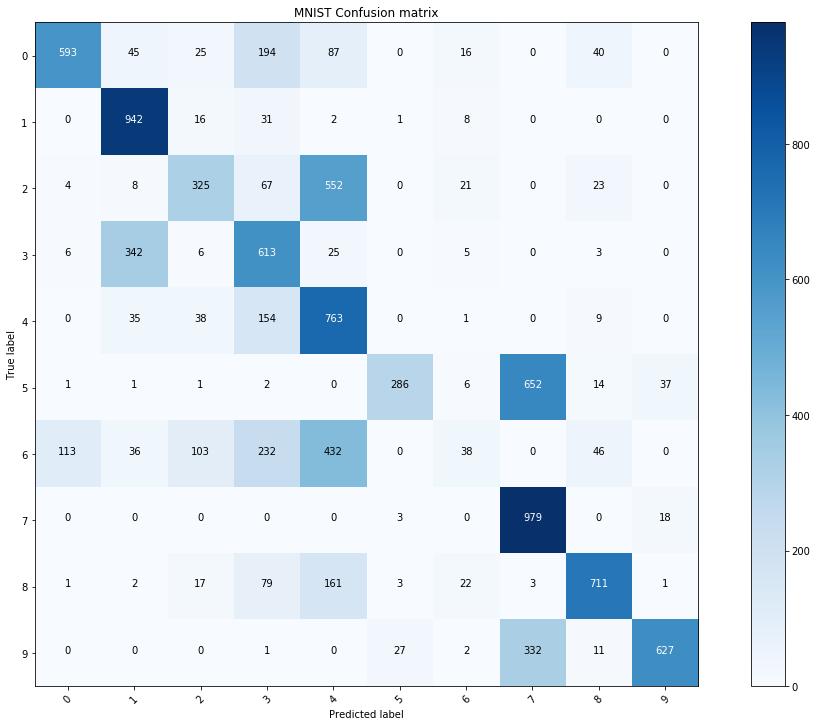

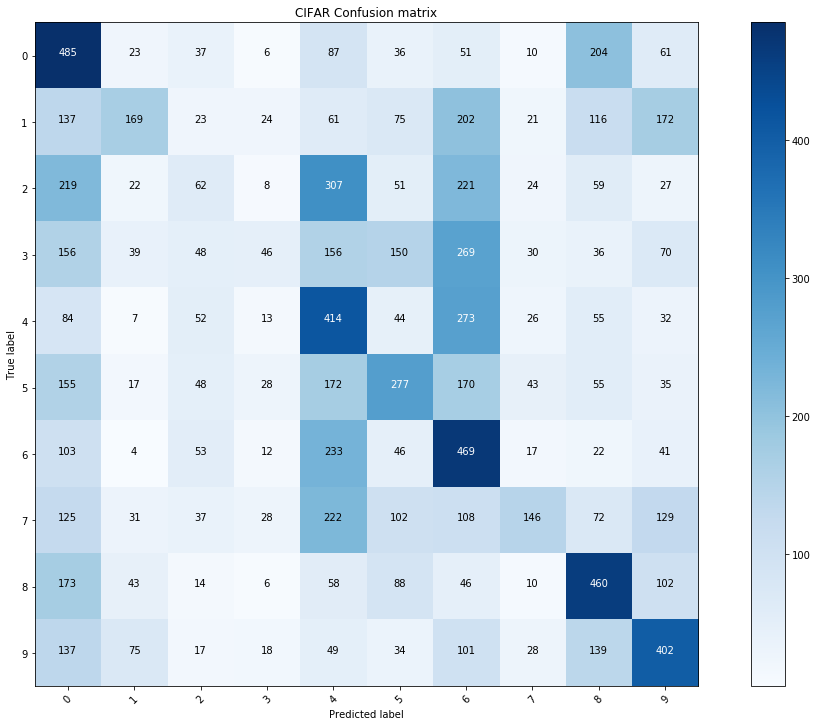

In [19]:
# Compute confusion matrix
np.set_printoptions(precision=2)
cf_mnist = confusion_matrix(y_data_fmnist_test,predicted_fmnist)
cf_cifar = confusion_matrix(y_data_cifar_test,predicted_cifar)

# Plot MNIST confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(cf_mnist, classes=range(10),
                      title='MNIST Confusion matrix')
plt.show()

# Plot CIFAR confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(cf_cifar, classes=range(10),
                      title='CIFAR Confusion matrix')
plt.show()

<div class="alert alert-danger">
f) (text) Discuss the performance, compare them against a classifier that outputs
random class labels, and suggest ways in which performance could be improved 
</div>


In [23]:
#Random classifier accuracy
mnist_pred_random = np.random.randint(0, 10, len(y_data_fmnist_test))
cifar_pred_random = np.random.randint(0, 10, len(y_data_cifar_test))
correct_mnist = get_accuracy(mnist_pred_random, y_data_fmnist_test)
correct_mnist = get_accuracy(cifar_pred_random, y_data_cifar_test)
print("Accuracy for random classifier with MNIST: " ,correct_mnist )
print("Accuracy for random classifier with CIFAR: " , correct_mnist )

Accuracy for random classifier with MNIST:  9.82
Accuracy for random classifier with CIFAR:  9.82


<div class="alert alert-info">
<h4>Answer </h4>
<br>
By comparing the two confusion matrixes, it's obvious that the classifier works better on the MNIST dataset, with  diagonal values reflecting an acceptable accuracy on predicting the right class. As expected, the CIFAR matrix, is much more mixed in term of results.

<br>
In term of numercial results, MNIST classification accuracy is 3 times higher than CIFAR classification, and MNIST log-likelihood 4 times lower. This was expected because of the big dimensonality of CIFAR dataset. 
<br>
More generally, these performences are not that high comparing to some current models delivering a 90% accuracy (cf deep-learning course). But it is still better than a random classifier with an accuracy around $1/(number of classes)$.

<br>
<br>
Clearly, one way for improving the model is to include the idea of correlation between the images.
We coul abandon the naive hypotesis of independence and use multivariate Gaussian distributions. 
<br>
In term of optimisation of the code, we could have used np.array to fasten the execution time, but it would have been a little long still for CIFAR.



<br>
<br>Finally, we can also observe that the results with one data batch or with 5 gives a same accuracy, so we can use only 1000 data train points instead of 6000 in this case (still to fasten the computation).
</div>


<div class="alert alert-danger">

<h4>4) Bayesian Linear Regression </h4>
<br>
a) (code) Implement Bayesian Linear Regression (you should already have an implementation from the lab sessions) 
<br>
</div>


<div class="alert alert-light" role="alert">
To implement the regression, we use the same method as explained in the third laboratory. 
<br>
<br>
In this model, we are modeling observations as noisy realizations of a linear combination of the features:
$p(t\vert {w}, {X}, \sigma^2) = \mathcal{N}(Xw; \sigma^2I)$
<br>The gaussian prior over model parameters is: $p(w) = \mathcal{N}(0; S)$
<br> It is conjugate to the likelihood.
<br>
<br>So the posterior must be Gaussian: $p(w\vert {X}, {t}, \sigma^2) = \mathcal{N}(\mu;\Sigma)$
<br>  Its covariance: ${(  (1/\sigma^2) {X^T}{X} + \mathbf{S}^{-1} ) }^{-1}$
<br>  Its mean: $(1/\sigma^2){\Sigma}{X^T}{t}$
<br> They are obtained by applying : posterior∝likelihood×prior


<br>
<br>Then we  use the formula of themarginal likelihood:
$$
p(t_{new}\vert \mathbf{X}, \mathbf{t}, \mathbf{x_{new}}, \sigma^2) = \mathcal{N}(\mathbf{x^T_{new}} \mathbf{\mu}, \sigma^2 + \mathbf{x^T_{new}} \mathbf{\Sigma}^{-1} \mathbf{x_{new}})
$$

</div>

In [9]:
def get_X(x, order):
    return np.array([np.array([x_i[1:]**n for n in range(order + 1)]).flatten() for x_i in np.array(x)])
    #here we ignore the first column
    #Here the x_i are no more points but vectors contrary to the course.


def bayes_lin_regr(train,test,t, sigma2=1, order=1):
    
    #Prior covariance
    prior_cov_size = (order+1)*(len(train[0])-1)
    prior_cov = np.zeros((prior_cov_size,prior_cov_size)) + np.diag(np.random.uniform(0, 1, prior_cov_size))
    
    
    X = get_X(train, order)
    
    #Finding posterior parameters
    Sigma = np.linalg.inv(X.T.dot(X)/sigma2 + np.linalg.inv(prior_cov))
    mu = Sigma.dot(X.T).dot(t)/sigma2
    
    X_test = get_X(test, order)
    
    pred_mean = X_test.dot(mu) #mean of the predictive density
    #pred_var = (sigma2 + X_test.dot(np.linalg.inv(Sigma)).dot(X_test.T)).diagonal() #variance of the predictive density
    return pred_mean

<div class="alert alert-danger">
b) (code) Treat class labels as continuous and apply regression to the training data.
</div>

In [10]:
pred_mean_mnist = bayes_lin_regr(np.array(data_fmnist_train),np.array(data_fmnist_test),np.array(y_data_fmnist_train))

In [11]:
pred_mean_cifar = bayes_lin_regr(np.array(data_cifar_train),np.array(data_cifar_test),np.array(y_data_cifar_train))

<div class="alert alert-danger">


c) (code) Produce a scatter plot showing the predictions versus the true targets for the
test set and compute the mean squared error on the test set 
</div>

### Scatter Plots

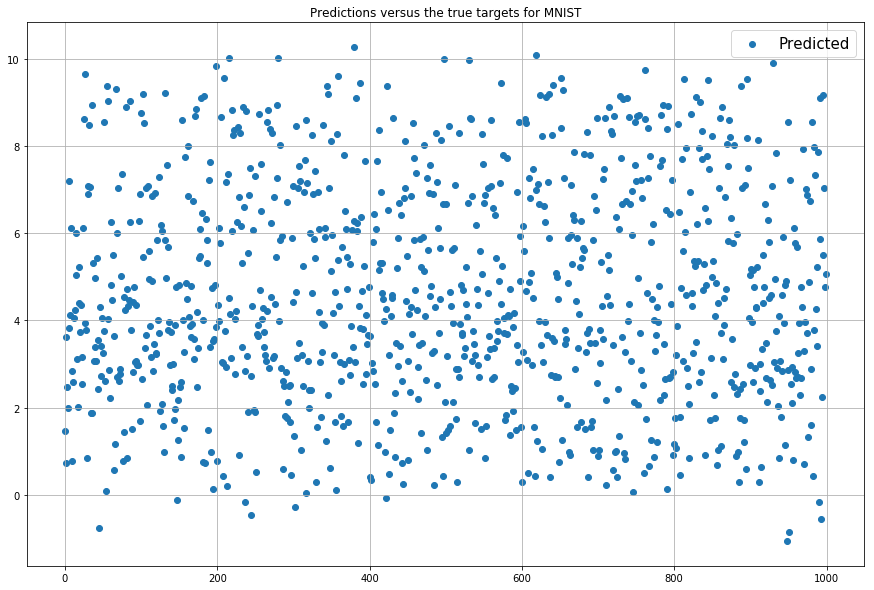

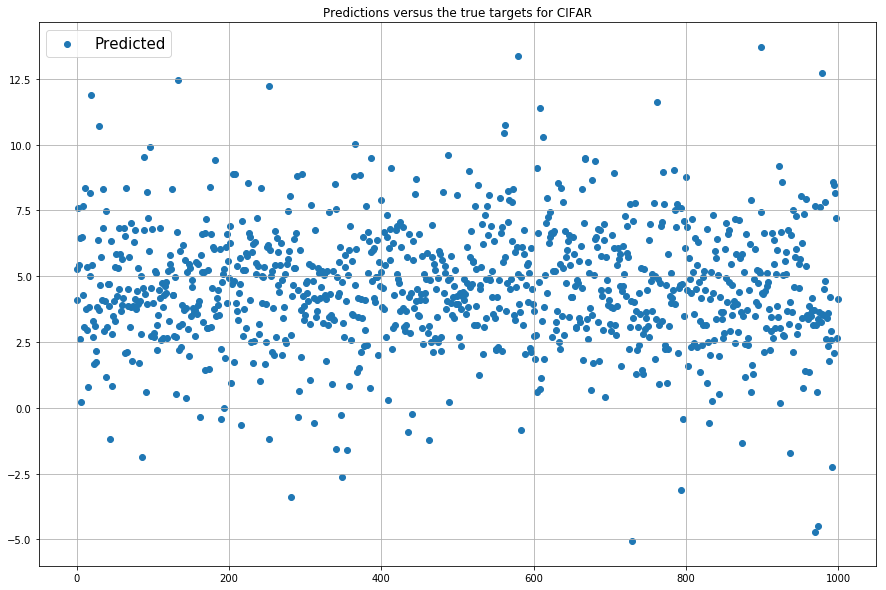

In [22]:
#Scatter Plots
#MNIST
limit = 1000
plt.figure(figsize=(15,10))
plt.title('Predictions versus the true targets for MNIST')
plt.scatter(range(limit), pred_mean_mnist[:limit], label="Predicted")
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, prop={'size':15})
plt.grid(True)

plt.show()

#CIFAR
limit = 1000
plt.figure(figsize=(15,10))
plt.title('Predictions versus the true targets for CIFAR')
plt.scatter(range(limit), pred_mean_cifar[:limit], label="Predicted")
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, prop={'size':15})
plt.grid(True)

plt.show()

#Plots used in the first ASI laboratory.

<h4>Comment</h4>
<br>We observe that both predictions cover a wide range of the grid. It is a relative good result. However, for the MNIST dataset we can notice some gaps in the repartition. 
<br> We clearly see the the predictions going out of [0,9].
<br> We decided not to put all the points but 1000 of it to have a better visulization.


### Mean squared error

In [17]:
mse_mnist = mean_squared_error(y_data_fmnist_test, pred_mean_mnist)
mse_cifar = mean_squared_error(y_data_cifar_test, pred_mean_cifar)
print('MSE for MNIST dataset: ', mse_mnist)
print('MSE for CIFAR dataset: ', mse_cifar)

MSE for MNIST dataset:  1.9638540745445852
MSE for CIFAR dataset:  11.838399016020727


<h4>Comment</h4>
<br>  The MSE value shows that on average we are sqrt(3.8) away from the true label for MNIST and sqrt(121) for CIFAR. 

<div class="alert alert-danger">
d) (text) Suggest a way to discretize predictions and display the confusion matrix on the
test data and report accuracy 
</div>

### Discretisation

<div class="alert alert-info">
<h4>Answer </h4>
<br>
The simplest way to discretize predictions is to round the obtained values, taking into account that the classes should not exceed 9 or fall behind 0. Here is a simple function implementing this method.
</div>

In [18]:
def borders(val):
    val = round(val)
    if val > 9:
        val = 9
    if val < 0:
        val = 0
    return val

def rounding(labelset):
    return [borders(pred) for pred in labelset]

In [19]:
discr_pred_mnist = rounding(pred_mean_mnist)
discr_pred_cifar = rounding(pred_mean_cifar)

Now that we have our definitive classes prediction choice, we can study the same performences as in part 3.

### Confusion Matrix

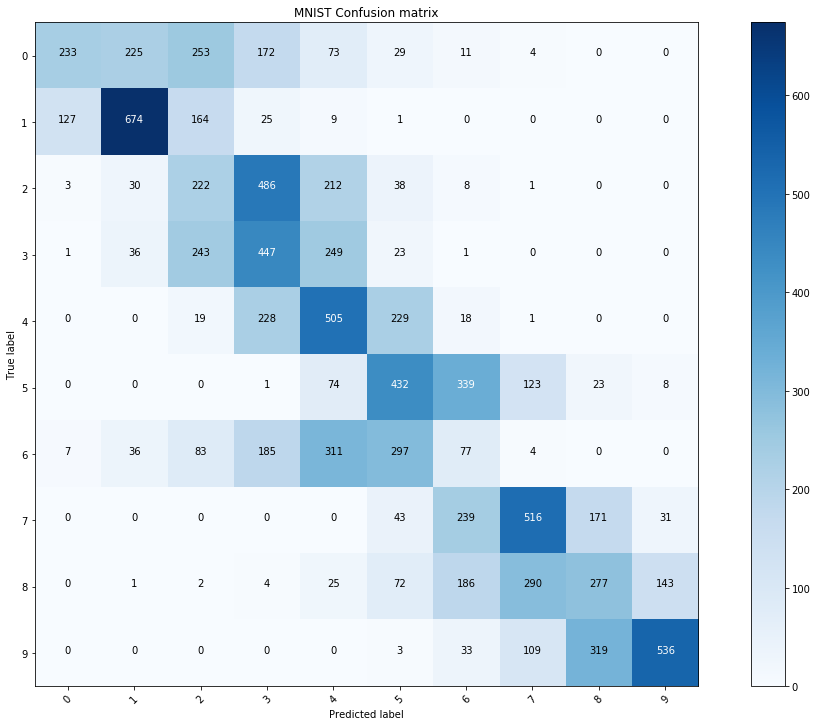

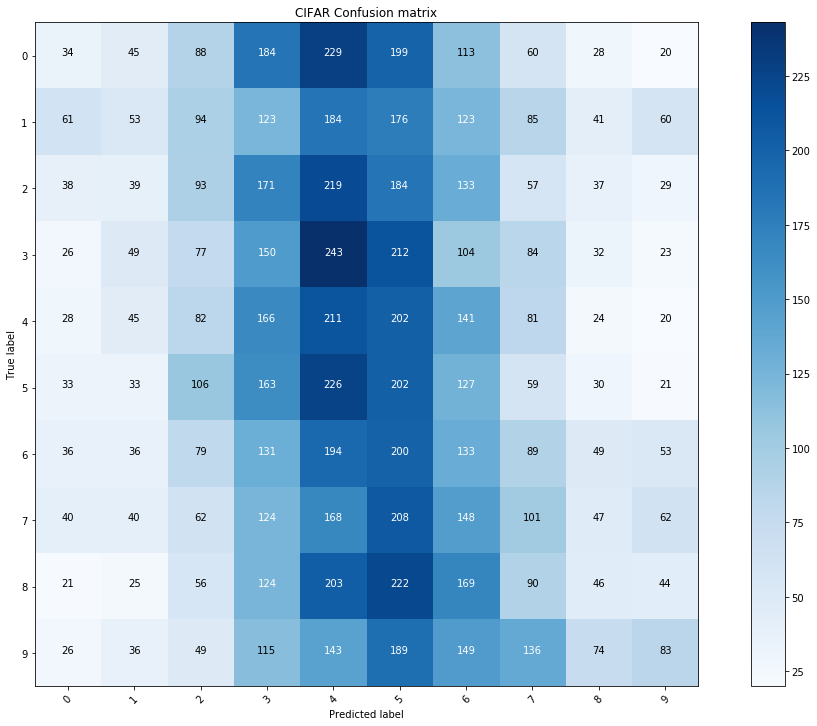

In [24]:
# Compute confusion matrix
np.set_printoptions(precision=2)
cf_mnist = confusion_matrix(y_data_fmnist_test,discr_pred_mnist)
cf_cifar = confusion_matrix(y_data_cifar_test,discr_pred_cifar)

# Plot MNIST confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(cf_mnist, classes=range(10),
                      title='MNIST Confusion matrix')
plt.show()

# Plot CIFAR confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(cf_cifar, classes=range(10),
                      title='CIFAR Confusion matrix')
plt.show()

### Accuracy 

In [20]:
#Accuracy
print('Accuracy for MNIST dataset: ', get_accuracy(discr_pred_mnist,y_data_fmnist_test))
print('Accuracy for CIFAr dataset: ', get_accuracy(discr_pred_cifar,y_data_cifar_test))

Accuracy for MNIST dataset:  39.19
Accuracy for CIFAr dataset:  11.06


<div class="alert alert-danger">
e) (text) Discuss regression performance with respect to classification performance 
</div>

 <div class="alert alert-info">
<h4>Answer</h4>


<br>
We can see that the results get worse. But is it possible that it could have been better using a better preproccessing, taking more into account the fact that the data are categorical. We can use 'one hot encoder' or 'get dummies' applied to our labels.
<br>

<br>
As happened with the Naive Bayesian classifier, a relative good accuracy has been reached on the MNIST dataset but not on CIFAR10, suggesting that even Bayesian Linear regression is not a good classifier for images. This time, the confusion matrix for the CIFAR dataset is a little better in the centered values, but definitively not in the border values. 
<br> 
But there is no major improvment comparing to the regression.
<br>
<br>
Actually, we didn't apply the regression model as we did during the laboatories, because here the data is multidimensional. Therefore, what we did is equivalent to multiple separate linear regressions.
<br><br>
We see that there is no significant differances between our two approaches for the MNIST dataset. It probably means that we reached the best values possible for the weights for these datasets (pre-processed as we did) and with Bayes assumptions (and non categorical figures). <br>
Nevertheless, we can't say the same for the CIFAR dataset, and a lot of improvment is still possible for this kind of data.
<br>
<br>
To conclude, we can add that in general, it is not very appropriate to compare regression with classification methods since they don't predict the same kind of objects. Here there is an overloap of them because of the discretization.
</div>

<div class="alert alert-danger">
f) (text) Describe one limitation of using regression for this particular task. 
</div>

<div class="alert alert-info">
<h4>Answer</h4>
<br>
The major limitation using regression in our case is the assumption of linearity between the inputs and the outpouts. If it is not the case, then you can't expect to obtain a good accuracy.
<br>
<br>
As already mentioned in part 3, other more flexible models can have a much better accuracy because they don't  assign a fixed weight to each pixel. For instance, Neural Networks have a threshold value for accepting the linear combinations. Convolutional Neural Networks can be well adapted since they take into account the structure of the data.
<br>
<br>
We can mention other issues related to this problem:<br>
- sensitivity to outliers<br>
- strong necessity to have indeppendant features<br>
- with complicated relationship between the features, the noise can even be confused with the real data<br>
- the model becomes unadapted after modifying only few features<br>
</div>

<div class="alert alert-danger">
<h4> 5) Bonus question </h4>
The state-of-the-art in these image classification problems suggests that convolutional layers in convolutional neural networks yield most of the improvements compared to standard neural networks. The reason is that they are capable of modeling spatial patterns through the hierarchical analysis of patches of images. Propose and implement ways to exploit patch information in the Naïve Bayes classifier or linear regression. A couple of suggestions are: (i) apply Naïve Bayes classification to the output of convolutional layer in the LeNet architecture (ii) construct the Naïve Bayes classifier by calculating patch-specific statistics and extend this by stacking multiple of these.

</div>

## Using Lenet 5 model

We already implemented the Lenet 5 model during a deeplearning session, with Tensorflow. To adapt the model with python, I used this ressource: https://keras.io/datasets/. Keras has CIFAR and MNIST datasets. We will try to improve the previous Bayesian Classifier model for the MINIST dataset.

### Imports

In [1]:
import keras

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
!pip install dill
import dill
dill.dump_session('notebook_env.db')

In [3]:
!pip install keras

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


#### Implementation of the network

In [4]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(6, (5, 5), padding="same", activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Conv2D(16, (5, 5), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Flatten())
## we stop here at the flatten layer level in order to use the bayesian regressor

model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 412us/step - loss: 0.6452 - acc: 0.7585 - val_loss: 0.4623 - val_acc: 0.8324
Epoch 2/10
60000/60000 [==============================] - 23s 383us/step - loss: 0.3926 - acc: 0.8549 - val_loss: 0.3921 - val_acc: 0.8568
Epoch 3/10
60000/60000 [==============================] - 23s 387us/step - loss: 0.3373 - acc: 0.8758 - val_loss: 0.3571 - val_acc: 0.8715
Epoch 4/10
60000/60000 [==============================] - 22s 374us/step - loss: 0.3076 - acc: 0.8871 - val_loss: 0.3415 - val_acc: 0.8773
Epoch 5/10
60000/60000 [==============================] - 22s 375us/step - loss: 0.2862 - acc: 0.8949 - val_loss: 0.3393 - val_acc: 0.8740
Epoch 6/10
60000/60000 [==============================] - 23s 380us/step - loss: 0.2688 - acc: 0.9008 - val_loss: 0.3060 - val_acc: 0.8898
Epoch 7/10
60000/60000 [===================

### Removing the output layers

In [ ]:
# popping 3 last layers -> output of the flatten layer after the convolutions# poppin 
model.layers.pop(); model.layers.pop(); model.layers.pop()
model.outputs = [model.layers[-1].output]
model.layers[-1].outbound_nodes = []
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

### Lenet 5 Prediction

In [5]:
# Re formating the output for the input of the classifier
def addlabels(dataset,label):
    for i in range(dataset):
        dataset[i] = label[i] + dataset[i]
    return dataset
        
        

In [ ]:
mnist_Xconv_train = model.predict(x_train)
mnist_Xconv_test = model.predict(x_test)


cnn_fmnist_train = mnist_Xconv_train.tolist()
cnn_fmnist_test = mnist_Xconv_test.tolist()

y_cnn_fmnist_train = [np.argmax(y_train[i]) for i in range(len(y_train))]
y_cnn_fmnist_test = [np.argmax(y_test[i]) for i in range(len(y_test))]


#Adding the value of the label for the first column
cnn_fmnist_train = addlabels(cnn_fmnist_train,y_cnn_fmnist_train)
y_cnn_fmnist_test = addlabels(cnn_fmnist_test,y_cnn_fmnist_test)

### Classifier Prediction

In [12]:
predicted_cnn_fmnist, proba_cnn_fmnist = bayesianClassifier(cnn_fmnist_test,cnn_fmnist_train)


In [16]:
#Accuracy
acc_mnist = get_accuracy(predicted_cnn_fmnist,y_cnn_fmnist_test)
print('Accuracy for MNIST dataset: ', acc_mnist)

# Log likelihood
print("Log likelihood for MNIST dataset:",log_likelihood(predicted_cnn_fmnist,proba_cnn_fmnist))

Accuracy for MNIST dataset:  64.0
Log likelihood for MNIST dataset: -3341


<div class="alert alert-info" role="alert">
**Answer**

<br>
We can observe that the accuracy increased by 8 percent. We could expect more if we train the cnn with more than 10 epochs. This results confirms that Neureal Networks are more adapted for dealing with images as they handle the structure of the pictures and take advantage of their patterns, without assumption of linearity between inputs and outputs.



</div>